Current Working Directory:
c:\Users\Cley\Desktop\DataScience_Projects\Data_Analysis
Data loaded successfully!

First 10 rows of Subscriber Data:
   SubscriberIdentityNumber  Phone Number Subscriber Name        SSN  \
0           345278656547333    1654788999            Mike  214448881   
1           345278666547334    1888777222            John  214448882   
2           345278676547335    1122765445           James  214448883   
3           345278686547336            10          Robert  214448884   
4           345278696547337    1590741891          Thomas  214448885   
5           345278706547338            20         Charles  214448886   
6           345278716547339    1058718337             Sam  214448887   
7           345278726547340    1292706560          Antony  214448888   
8           345278736547341    1526694783             Raj  214448889   
9           345278746547342    1526694784           Brian  214448890   

   Subscriber Age    State  Zip Code SubscribedFromDate Intern

C:\Users\Cley\AppData\Local\Temp\ipykernel_16292\246914149.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\Cley\AppData\Local\Temp\ipykernel_16292\246914149.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

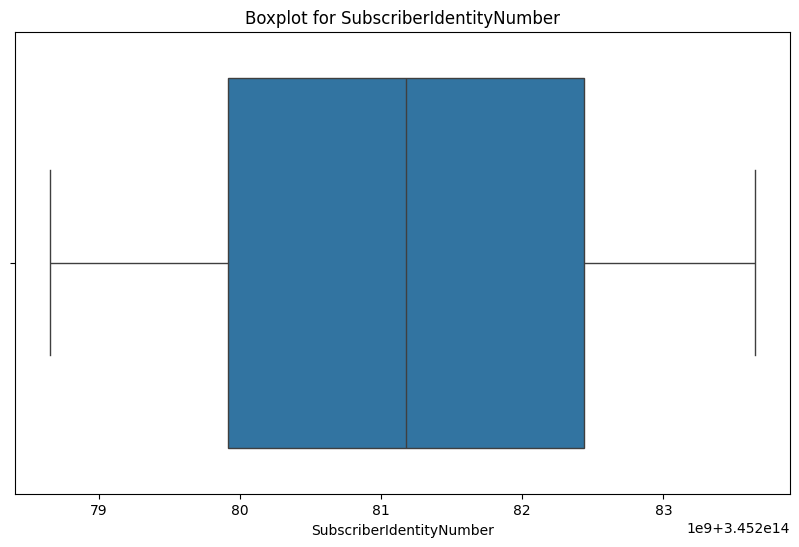


Outliers in SubscriberIdentityNumber: 0
Percentage of outliers: 0.00%


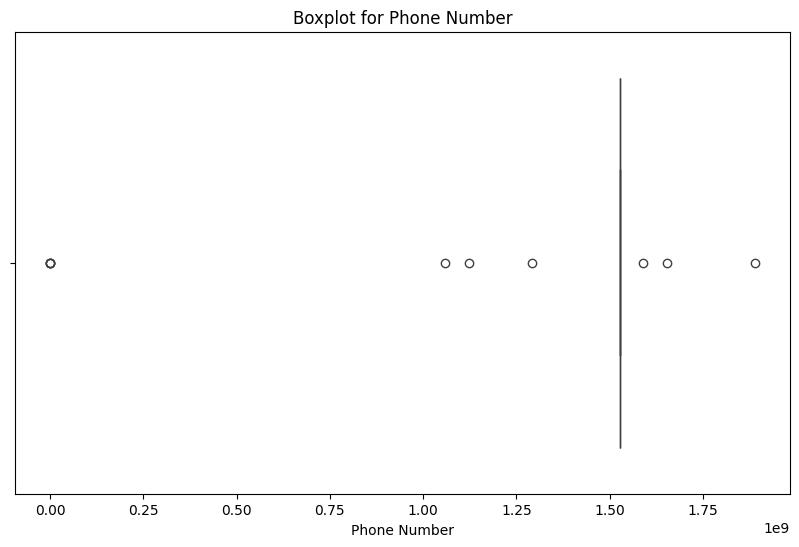


Outliers in Phone Number: 5
Percentage of outliers: 0.99%


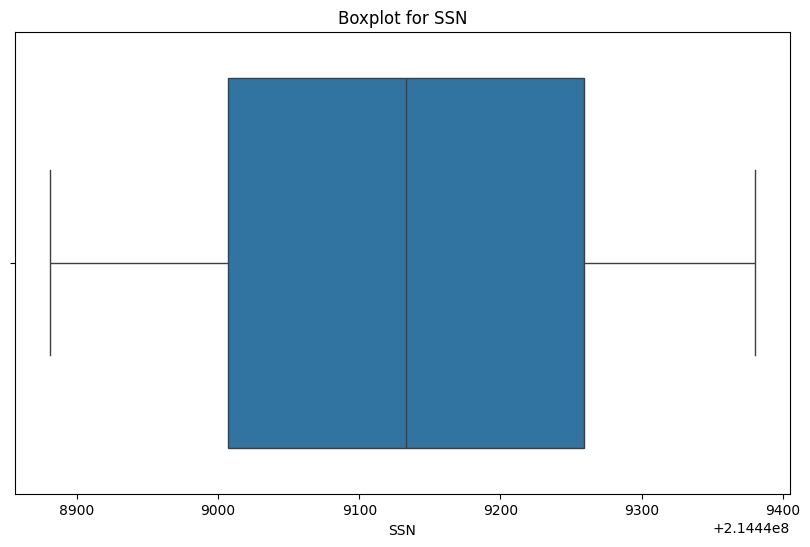


Outliers in SSN: 0
Percentage of outliers: 0.00%


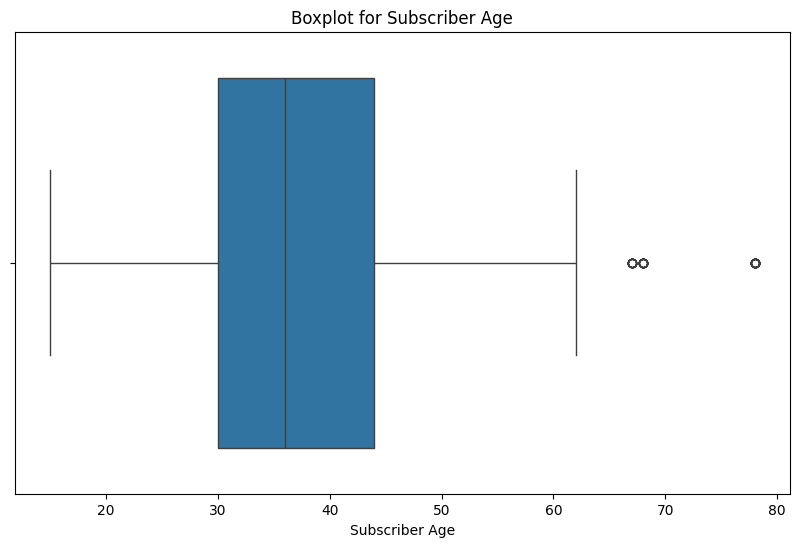


Outliers in Subscriber Age: 0
Percentage of outliers: 0.00%


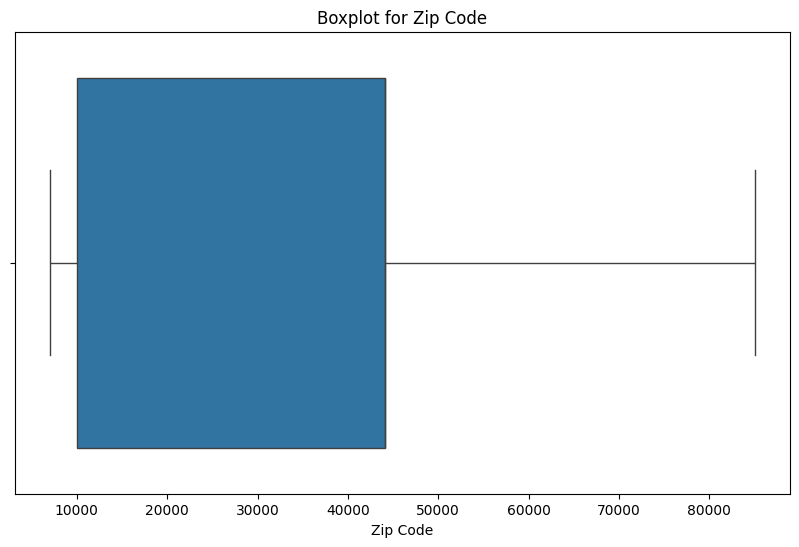


Outliers in Zip Code: 0
Percentage of outliers: 0.00%

Analyzing outliers in Activity Data:


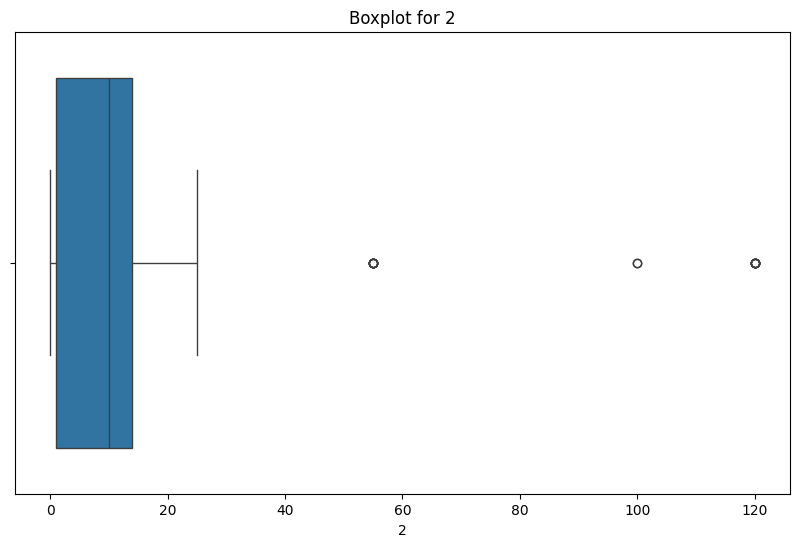


Outliers in 2: 18
Percentage of outliers: 1.80%

Shape after removing outliers:
Subscriber Data: (500, 11)
Activity Data: (981, 4)

Duplicates in Subscriber Data:
Number of duplicate rows removed: 5
Percentage of duplicates: 1.00%

Duplicates in Activity Data:
Number of duplicate rows removed: 480
Percentage of duplicates: 48.93%

Final shape of Subscriber Data: (495, 11)
Final shape of Activity Data: (501, 4)

Preprocessed data saved successfully!

FINAL SUMMARY

Preprocessing Summary for Subscriber Data
--------------------------------------------------
Original number of rows: 505
Final number of rows: 495
Total rows removed: 10
Percentage of data retained: 98.02%
Column-wise null values after cleaning:
SubscriberIdentityNumber    0
Phone Number                0
Subscriber Name             0
SSN                         0
Subscriber Age              0
State                       0
Zip Code                    0
SubscribedFromDate          0
Internet Service            0
SMS Service  

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Step 0: Check the current working directory
print("Current Working Directory:")
print(os.getcwd())

# Step 1: Change directory if required
# Uncomment the following line if the working directory is incorrect.
os.chdir('C:/Users/Cley/Desktop/DataScience_Projects/Data_Analysis')

# Step 2: Load the datasets
def load_data(file_path):
    """
    Load data from CSV file
    """
    return pd.read_csv(file_path)


# Load both datasets
try:
    subscriber_data = load_data('C:/Users/Cley/Desktop/DataScience_Projects/Data_Analysis/SubscribersData.csv')  # Correct filename
    activity_data = load_data('C:/Users/Cley/Desktop/DataScience_Projects/Data_Analysis/ActivityData.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: Please ensure CSV files are in the correct directory")
    # To list the current directory files to help troubleshoot
    print("Files in the current directory:")
    print(os.listdir())

# Step 3: Print first 10 rows
print("\nFirst 10 rows of Subscriber Data:")
print(subscriber_data.head(10))
print("\nFirst 10 rows of Activity Data:")
print(activity_data.head(10))

# Step 4: Determine dataset shapes
print("\nSubscriber Data Shape:", subscriber_data.shape)
print("Activity Data Shape:", activity_data.shape)

# Step 5: Check for null values
def check_null_values(df, dataset_name):
    """
    Check and display null values in the dataset
    """
    print(f"\nNull values in {dataset_name}:")
    print(df.isnull().sum())
    print(f"\nPercentage of null values in {dataset_name}:")
    print((df.isnull().sum() / len(df)) * 100)

check_null_values(subscriber_data, "Subscriber Data")
check_null_values(activity_data, "Activity Data")

# Step 6: Compute measures of central tendency
def compute_statistics(df, dataset_name):
    """
    Compute and display statistical measures for numeric columns
    """
    print(f"\nStatistical measures for {dataset_name}:")
    print(df.describe())

compute_statistics(subscriber_data, "Subscriber Data")
compute_statistics(activity_data, "Activity Data")

# Step 7: Handle null values
def fill_null_values(df):
    """
    Fill null values with appropriate measures of central tendency
    """
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            # Fill numeric columns with median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # Fill categorical columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

subscriber_data = fill_null_values(subscriber_data)
activity_data = fill_null_values(activity_data)

# Verify null values have been handled
print("\nVerifying null values after handling:")
check_null_values(subscriber_data, "Subscriber Data")
check_null_values(activity_data, "Activity Data")

# Step 8: Detect outliers using Z-score
def detect_outliers(df, threshold=3):
    """
    Detect outliers using Z-score method
    Returns a boolean mask of outliers
    """
    outlier_mask = pd.DataFrame()
    
    for column in df.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs(stats.zscore(df[column]))
        outlier_mask[column] = z_scores > threshold
        
        # Visualize distribution with boxplot
        plt.figure(figsize=(10, 6))
        plt.title(f'Boxplot for {column}')
        sns.boxplot(x=df[column])
        plt.show()
        
        # Print outlier statistics
        outlier_count = sum(z_scores > threshold)
        print(f"\nOutliers in {column}: {outlier_count}")
        print(f"Percentage of outliers: {(outlier_count/len(df)*100):.2f}%")
    
    return outlier_mask.any(axis=1)

# Detect and visualize outliers
print("\nAnalyzing outliers in Subscriber Data:")
subscriber_outliers = detect_outliers(subscriber_data)
print("\nAnalyzing outliers in Activity Data:")
activity_outliers = detect_outliers(activity_data)

# Step 9: Remove outliers
subscriber_data_clean = subscriber_data[~subscriber_outliers]
activity_data_clean = activity_data[~activity_outliers]

print("\nShape after removing outliers:")
print("Subscriber Data:", subscriber_data_clean.shape)
print("Activity Data:", activity_data_clean.shape)

# Step 10: Check and remove duplicates
def remove_duplicates(df, dataset_name):
    """
    Remove duplicate rows and display information
    """
    initial_rows = len(df)
    df_clean = df.drop_duplicates()
    duplicate_count = initial_rows - len(df_clean)
    
    print(f"\nDuplicates in {dataset_name}:")
    print(f"Number of duplicate rows removed: {duplicate_count}")
    print(f"Percentage of duplicates: {(duplicate_count/initial_rows*100):.2f}%")
    
    return df_clean

subscriber_data_clean = remove_duplicates(subscriber_data_clean, "Subscriber Data")
activity_data_clean = remove_duplicates(activity_data_clean, "Activity Data")

# Step 11: Print final shapes
print("\nFinal shape of Subscriber Data:", subscriber_data_clean.shape)
print("Final shape of Activity Data:", activity_data_clean.shape)

# Step 12: Save preprocessed datasets
try:
    subscriber_data_clean.to_csv('preprocessed_subscriber_data.csv', index=False)
    activity_data_clean.to_csv('preprocessed_activity_data.csv', index=False)
    print("\nPreprocessed data saved successfully!")
except Exception as e:
    print(f"Error saving files: {e}")

# Step 13: Print summary of preprocessing steps
def print_preprocessing_summary(original_df, cleaned_df, dataset_name):
    """
    Print summary of all preprocessing steps
    """
    print(f"\nPreprocessing Summary for {dataset_name}")
    print("-" * 50)
    print(f"Original number of rows: {len(original_df)}")
    print(f"Final number of rows: {len(cleaned_df)}")
    print(f"Total rows removed: {len(original_df) - len(cleaned_df)}")
    print(f"Percentage of data retained: {(len(cleaned_df)/len(original_df)*100):.2f}%")
    print("Column-wise null values after cleaning:")
    print(cleaned_df.isnull().sum())
    print("-" * 50)

print("\nFINAL SUMMARY")
print("="*50)
print_preprocessing_summary(subscriber_data, subscriber_data_clean, "Subscriber Data")
print_preprocessing_summary(activity_data, activity_data_clean, "Activity Data")

# Step 14: Additional visualization of the cleaned data
def plot_cleaned_data_distributions(df, dataset_name):
    """
    Create distribution plots for numeric columns in cleaned data
    """
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(15, 5*len(numeric_columns)))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column} in {dataset_name} (Cleaned)')
    plt.tight_layout()
    plt.show()

print("\nVisualization of cleaned data distributions:")
plot_cleaned_data_distributions(subscriber_data_clean, "Subscriber Data")
plot_cleaned_data_distributions(activity_data_clean, "Activity Data")

print("\nData preprocessing completed successfully!")
